In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import json
import os
os.chdir(r'D:\Py_Projects\neuro')

In [19]:
with open('models/correct/DeepSpeaker_100pers_10vox_20mfcc_tripl_011.json', 'r') as f:
    training_progress = json.load(f)

In [26]:
training_df = pd.DataFrame([*training_progress.values()][:-1])

In [1]:
training_df['epoch_acc_val'].max()

NameError: name 'training_df' is not defined

<Axes: >

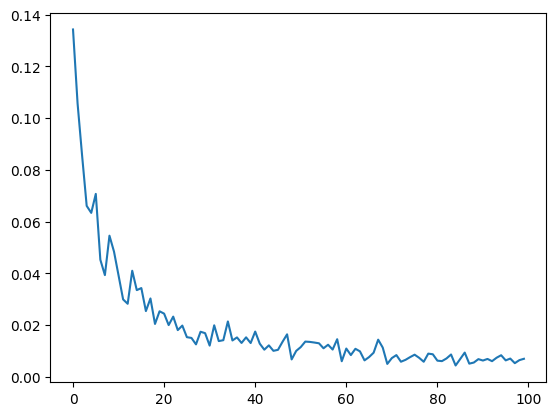

In [29]:
training_df['epoch_loss_val'].plot()

In [ ]:
"